### Imports

In [1]:
import pandas
import tensorflow as tf
from keras.models import load_model
import cv2
import numpy as np
import matplotlib.pyplot as plt

### Load Model

In [2]:
model = load_model('../vggseg.h5')

In [3]:
interpreter = tf.lite.Interpreter(model_path="../vggseg.tflite")
interpreter.get_input_details()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
# model.summary()

In [4]:
interpreter.allocate_tensors()

In [5]:
im = cv2.imread('1.jpg')

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_arr = np.array(im)
im_resized = cv2.resize(im_arr, (512,512), interpolation = cv2.INTER_NEAREST)
input_data = np.expand_dims(im_resized, axis=0)
input_data = np.float32(input_data)

interpreter.set_tensor(input_details[0]['index'], input_data)


In [6]:
interpreter.invoke()


[0.9955617  0.00443824 0.9987184  0.00128164 0.9982717  0.00172826
 0.99781287 0.00218706 0.9973884  0.00261156]
[0.9955617  0.9987184  0.9982717  0.99781287 0.9973884  0.9969664
 0.9966266  0.9963074  0.9961021  0.9957748 ]
(256, 256)
(1, 65536, 2)


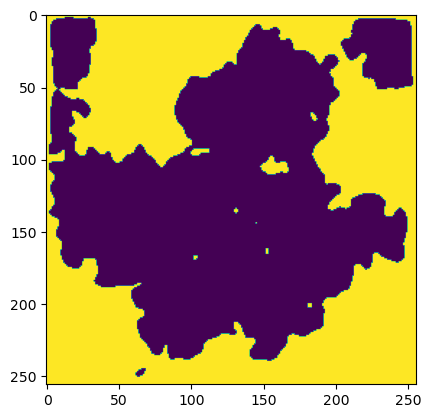

In [25]:
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data.flatten()[:20])
mask = np.reshape(output_data, (256, 256, -1))
mask = mask[:, :, 0]
print(mask.flatten()[:10])

mask[mask < 0.9],  mask[mask > 0.9] = 0, 255
plt.imshow(mask)
print(mask.shape)
print(output_data.shape)

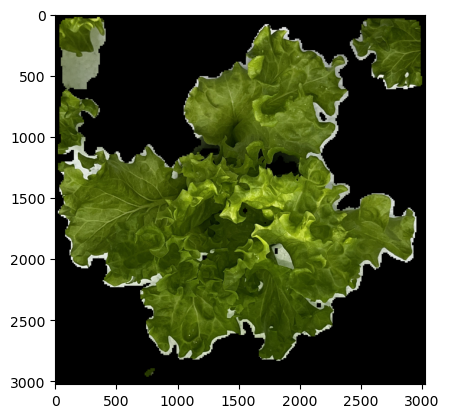

In [42]:
mask_resized = cv2.resize(mask, (3024, 3024), interpolation=cv2.INTER_NEAREST)
mask_resized = np.uint8(mask_resized)
mask_resized = np.invert(mask_resized)
masked = cv2.bitwise_and(im_arr, im_arr, mask=mask_resized)
plt.imshow(masked)

### Predict

In [32]:
im = cv2.imread('1.jpg')

im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
im_arr = np.array(im)
im_resized = cv2.resize(im_arr, (512,512), interpolation = cv2.INTER_NEAREST)
im_in = np.expand_dims(im_resized, axis=0)

f_pred = model.predict(im_in, batch_size=1)

1/1 [==============================] - 1s 1s/step


### Refine Prediction

(1, 65536, 2)
(256, 256, 2)
(256, 256)
[[0.9955617  0.9987184  0.9982717  ... 0.9982754  0.99924123 0.99653673]
 [0.9989806  0.9995191  0.99911815 ... 0.9991242  0.9997671  0.9988524 ]
 [0.998072   0.9987394  0.99725586 ... 0.99732    0.99944395 0.99821836]
 ...
 [0.99882144 0.9994711  0.9992238  ... 0.9992962  0.9997842  0.99883837]
 [0.99939036 0.9997627  0.9996588  ... 0.99967754 0.9998783  0.99901843]
 [0.995682   0.99907434 0.9988708  ... 0.99887174 0.9993216  0.9969067 ]]
[[255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 ...
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]
 [255. 255. 255. ... 255. 255. 255.]]


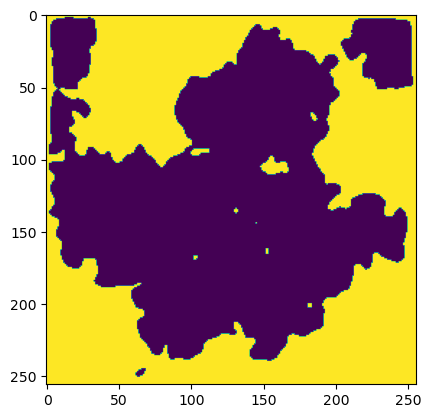

In [33]:
print(f_pred.shape)
mask = np.reshape(f_pred, (256, 256, -1))
print(mask.shape)
mask = mask[:, :, 0]
print(mask.shape)
print(mask)
mask[mask < 0.9],  mask[mask > 0.9] = 0, 255

print(mask)

plt.imshow(mask)

### Visualize

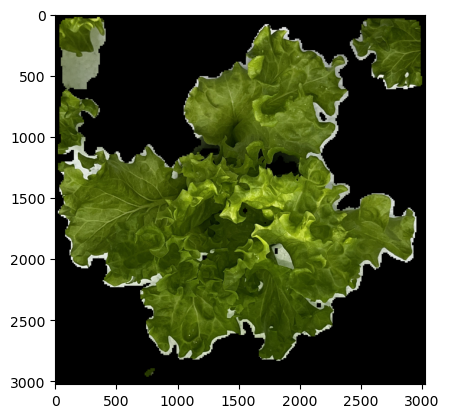

In [34]:
mask_resized = cv2.resize(mask, (3024, 3024), interpolation=cv2.INTER_NEAREST)
mask_resized = np.uint8(mask_resized)
mask_resized = np.invert(mask_resized)
masked = cv2.bitwise_and(im_arr, im_arr, mask=mask_resized)
plt.imshow(masked)

In [2]:
x = [0.99629825, 0.003701771, 0.9991185, 8.8151335E-4, 0.9990188, 9.811522E-4, 0.9989446, 0.0010554062, 0.9988218, 0.0011782119, 0.998684, 
     0.0013159723, 0.998566, 0.0014340052, 0.99849963, 0.0015003327, 0.998485, 0.0015150564, 0.9984732, 0.0015267245, 0.9984616, 0.0015384504, 0.9984515, 
     0.0015484558, 0.9984451, 0.001554877, 0.99844366, 0.0015563449, 0.99844813, 0.0015518767, 0.99845624, 0.0015437154, 0.9984666, 0.0015334624, 0.9984755, 
     0.0015244473, 0.99848, 0.0015199736, 0.99848, 0.0015200055, 0.9984754, 0.0015246064, 0.9984724, 0.0015275956, 0.99847347, 0.0015265741, 0.9984799, 
     0.0015201155, 0.9984894, 0.0015105926, 0.9985031, 0.0014968957, 0.9985183, 0.0014816688, 0.9985336, 0.0014663865, 0.9985461, 0.0014539391, 0.9985555,
     0.0014445082, 0.99855965, 0.0014404134, 0.99856085, 0.0014391821, 0.9985587, 0.0014413609, 0.9985581, 0.001441908, 0.9985606, 0.0014394041, 0.9985683, 
     0.0014317053, 0.99857974, 0.0014202746, 0.99859303, 0.001406998, 0.9986041, 0.0013959564, 0.9986119, 0.0013879944, 0.99861574, 0.0013842824, 0.99862015, 
     0.0013798559, 0.9986253, 0.0013747469, 0.9986312, 0.0013688378, 0.99863774, 0.001362217, 0.9986431, 0.0013569071, 0.9986455, 0.0013544835, 0.99864465, 0.0013553242, 
     0.99864143, 0.0013585362, 0.9986374, 0.0013625802, 0.9986345, 0.001365491, 0.99863297, 0.0013669957, 0.99863356, 0.0013663663, 0.9986344, 0.001365636, 0.9986345, 
     0.0013655227, 0.9986332, 0.0013667288, 0.9986318, 0.0013681685, 0.9986298, 0.001370176, 0.9986274, 0.0013726368, 0.9986237, 0.0013763144, 0.9986192, 0.0013807912, 
     0.99861467, 0.0013853651, 0.99861145, 0.0013884882, 0.9986098, 0.0013902023, 0.9986104, 0.0013896067, 0.99861, 0.0013899509, 0.99860793, 0.0013921249, 0.9986034, 
     0.0013966252, 0.9985973, 0.0014026754, 0.99859136, 0.0014086082, 0.99858725, 0.0014127836, 0.99858475, 0.0014152142, 0.99858487, 0.0014151684, 0.99858415, 0.0014158093, 
     0.99858177, 0.0014182499, 0.9985771, 0.0014229389, 0.99857056, 0.0014294445, 0.99856406, 0.0014359108, 0.99855953, 0.0014404751, 0.9985576, 0.0014424071, 0.9985581, 
     0.0014419272, 0.9985592, 0.0014407864, 0.9985605, 0.0014395254, 0.9985617, 0.0014382921, 0.9985629, 0.0014371044, 0.9985644, 0.0014356492, 0.99856585, 0.0014341951, 
     0.9985671, 0.0014328681, 0.99856806, 0.0014318887, 0.99856853, 0.0014313869, 0.99856853, 0.0014314804, 0.99856806, 0.0014318996, 0.9985677, 0.0014322802, 0.99856746, 
     0.0014324745, 0.9985676, 0.0014324085, 0.9985677, 0.0014322228, 0.9985682, 0.0014318451, 0.9985684, 0.0014315294, 0.99856865, 0.0014313298, 0.9985684, 0.0014315048, 
     0.9985678, 0.0014321015, 0.99856704, 0.0014329501, 0.9985662, 0.0014337621, 0.99856573, 0.0014342675, 0.9985656, 0.0014343904, 0.99856585, 0.0014341671, 0.9985662, 
     0.0014337697, 0.9985667, 0.0014332858, 0.99856704, 0.0014330226, 0.9985671, 0.001432849, 0.9985671, 0.0014328503, 0.9985671, 0.0014328866, 0.99856704, 0.0014329309, 
     0.9985672, 0.0014327659, 0.9985676, 0.001432355, 0.9985682, 0.0014317741, 0.9985689, 0.0014311254, 0.99856925, 0.0014307096, 0.99856937, 0.0014306607, 0.99856913, 
     0.0014308685, 0.99856853, 0.0014314129, 0.9985682, 0.0014318356, 0.99856806, 0.0014319542, 0.9985684, 0.0014315151, 0.99856937, 0.0014306089, 0.9985707, 0.001429303, 
     0.998572, 0.0014279751, 0.99857306, 0.00142691, 0.9985738, 0.0014262138, 0.99857426, 0.001425691, 0.9985746, 0.0014253284, 0.99857485, 0.0014251433, 0.9985751, 
     0.0014248807, 0.9985752, 0.0014248353, 0.998575, 0.0014250735, 0.9985744, 0.0014256252, 0.99857354, 0.0014264991, 0.99857247, 0.0014274891, 0.99857175, 0.0014282471, 
     0.9985713, 0.0014286498, 0.9985713, 0.0014286817, 0.9985714, 0.0014286328, 0.9985714, 0.001428609, 0.9985713, 0.0014287165, 0.99857116, 0.001428798, 0.99857116, 0.0014288784, 
     0.9985709, 0.0014290347, 0.9985707, 0.001429243, 0.9985703, 0.0014296024, 0.9985703, 0.001429646, 0.9985707, 0.0014292607, 0.99857163, 0.0014284063, 0.9985727, 0.0014273097, 
     0.9985738, 0.00142619, 0.9985746, 0.0014253447, 0.998575, 0.0014250096, 0.998575, 0.0014250735, 0.99857426, 0.0014257386, 0.9985732, 0.0014268048, 0.99857175, 0.0014282357, 
     0.9985703, 0.0014297122, 0.99856]


In [3]:
print(len(x))

323
